In [205]:
#Import plotting and APIs

In [206]:
!pip install pandas numpy matplotlib seaborn quandl
!pip install nasdaq-data-link

import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as py
import nasdaqdatalink
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score




In [207]:
#API key
quandl.ApiConfig.api_key = 'w7AFc1dvax8_m9B59bdk'

#Basic Analysis and Overview


##WTI Crude Oil

In [208]:

# these dataset codes can be changed for different nasdaq tickers, graphs will then need to be renamed individually
dataset_code1 = 'CHRIS/CME_CL1' # WTI Crude Oil
dataset_code2 = 'CHRIS/CME_NG1' # Natural Gas
dataset_code3 = 'CHRIS/ICE_B1'  # Brent Crude Oil
dataset_code4 = 'CHRIS/CME_GC1'  #Gold
dataset_code5 = 'CHRIS/CME_SI1' # Silver
dataset_code6 = 'CHRIS/CME_PL1' # Platimum
# these start and end dates can be changed here for the whole program to easily provide different analysis
end_date1 = '2021-01-01'
WTI_crude_oil = quandl.get(dataset_code1, start_date=start_date1, end_date=end_date1)

print(WTI_crude_oil.head())

             Open   High    Low   Last  Change  Settle     Volume  \
Date                                                                
2020-01-02  61.60  61.60  60.64  61.18    0.12   61.18   484686.0   
2020-01-03  61.18  64.09  61.13  63.04    1.87   63.05   874669.0   
2020-01-06  63.71  64.72  62.64  62.83    0.22   63.27   716888.0   
2020-01-07  62.91  63.15  62.11  62.69    0.57   62.70   572417.0   
2020-01-08  62.84  65.65  59.15  59.98    3.09   59.61  1190608.0   

            Previous Day Open Interest  
Date                                    
2020-01-02                    405868.0  
2020-01-03                    397446.0  
2020-01-06                    388479.0  
2020-01-07                    368505.0  
2020-01-08                    355552.0  


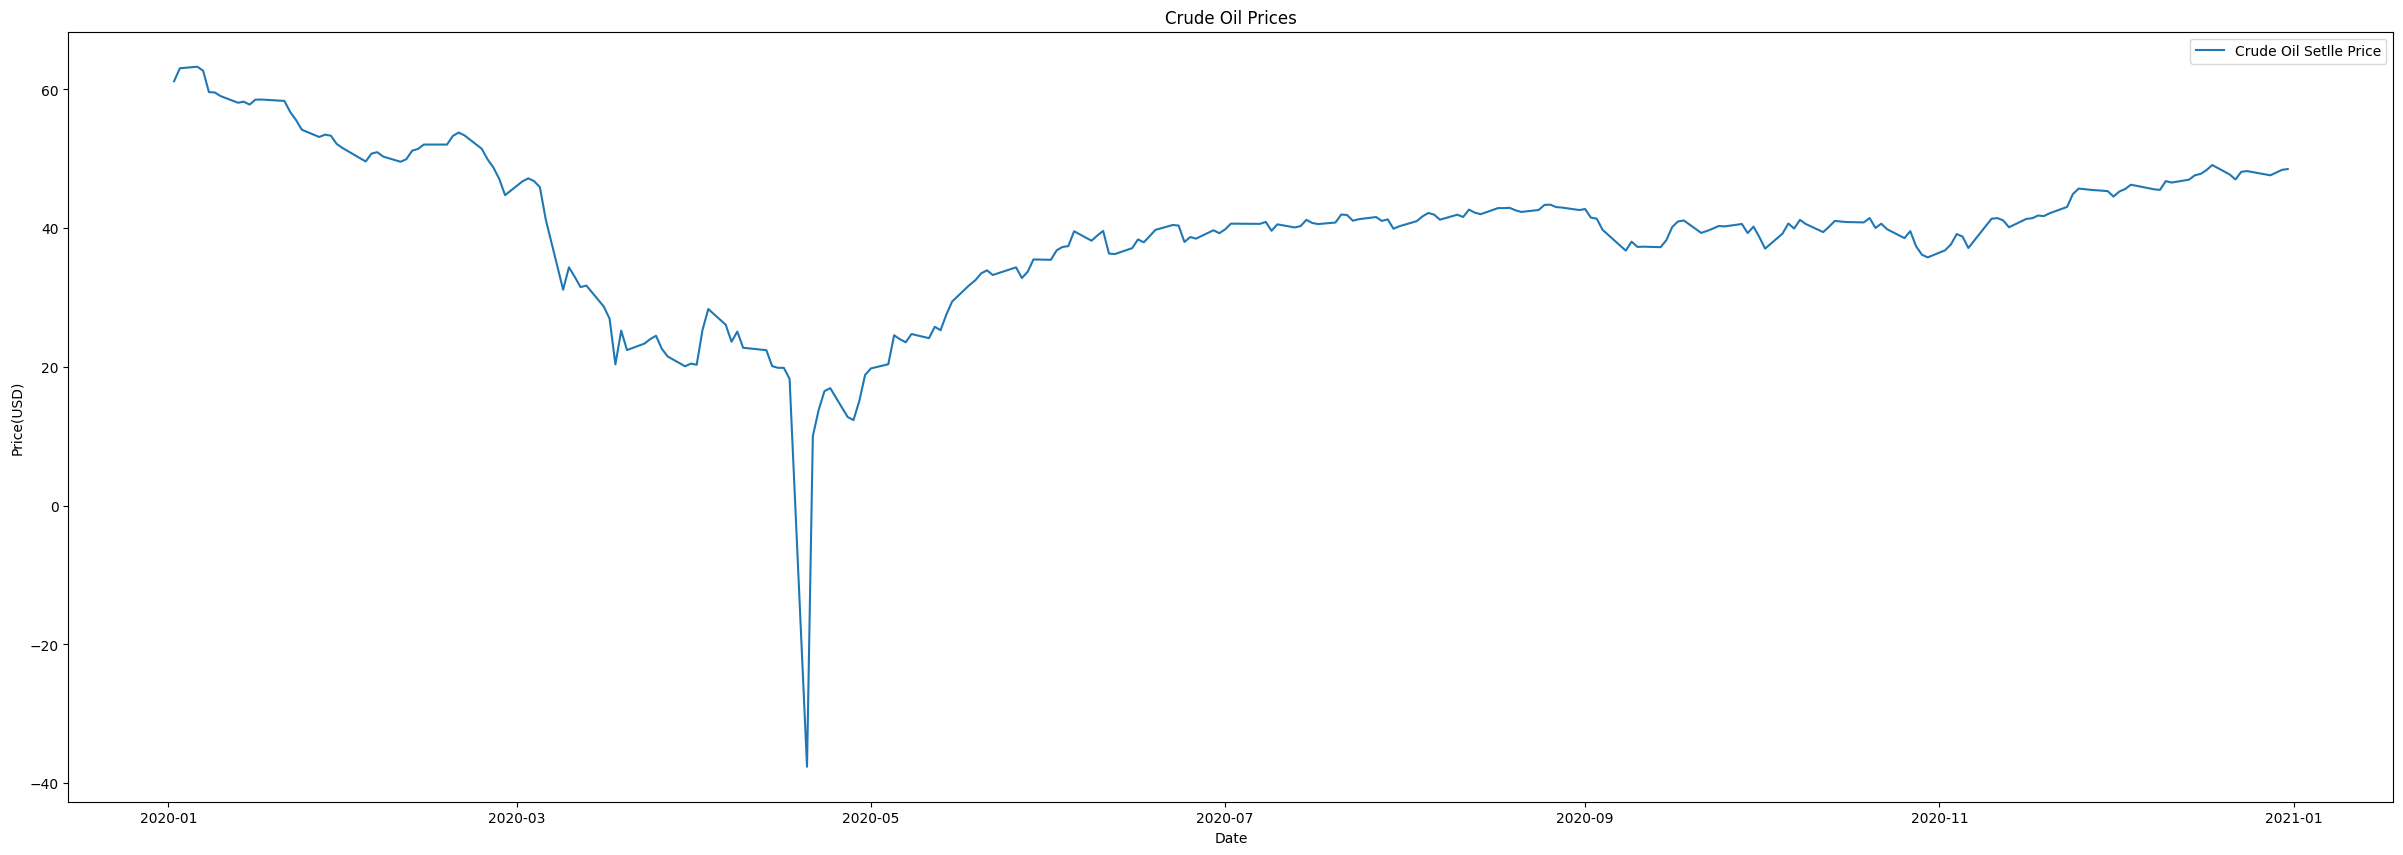

In [209]:
plt.figure(figsize=(30,10))
plt.plot(crude_oil.index, crude_oil['Settle'], label='Crude Oil Setlle Price')
plt.title('Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

In [210]:
WTI_crude_oil['MA_30'] = WTI_crude_oil['Settle'].rolling(window=30).mean()
WTI_crude_oil['MA_50'] = WTI_crude_oil['Settle'].rolling(window=50).mean()
WTI_crude_oil['MA_150'] = WTI_crude_oil['Settle'].rolling(window=150).mean()

In [211]:
WTI_crude_oil['Daily Return'] = WTI_crude_oil['Settle'].pct_change
WTI_crude_oil['Volatility'] = WTI_crude_oil['Settle'].rolling(window=50).std()

In [212]:
plt.figure(figsize=(30,10))
plt.plot(WTI_crude_oil.index, WTI_crude_oil['Settle'],label='Settle Price')
plt.plot(WTI_crude_oil.index, WTI_crude_oil['MA_30'],label='30-day moving average',color='orange')
plt.plot(WTI_crude_oil.index, WTI_crude_oil['MA_50'],label='50-day moving average', color='pink')
plt.plot(WTI_crude_oil.index, WTI_crude_oil['MA_150'],label='150-day moving average', color='red')
plt.title('WTI Crude Oil Prices with Moving averages (2010-2021)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
output_plot_file = 'WTI_crude_oil_moving_average.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")

Plot saved to WTI_crude_oil_moving_average.png


In [213]:
plt.figure(figsize=(30,10))
plt.plot(WTI_crude_oil.index,WTI_crude_oil['Volatility'],label='Volatility (50-day STD of Returns)',color='purple')
plt.title('WTI Crude Oil Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
output_plot_file = 'WTI_crude_oil_volatility.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")


Plot saved to WTI_crude_oil_volatility.png


##Brent Crude Oil

In [214]:
 brent_crude_oil = quandl.get(dataset_code3, start_date=start_date, end_date=end_date)
brent_crude_oil['MA_30'] = brent_crude_oil['Settle'].rolling(window=30).mean()
brent_crude_oil['MA_50'] = brent_crude_oil['Settle'].rolling(window=50).mean()
brent_crude_oil['MA_150'] = brent_crude_oil['Settle'].rolling(window=150).mean()
brent_crude_oil['Daily Return'] = brent_crude_oil['Settle'].pct_change
brent_crude_oil['Volatility'] = brent_crude_oil['Settle'].rolling(window=50).std()


In [215]:
plt.figure(figsize=(30,10))
plt.plot(brent_crude_oil.index, brent_crude_oil['Settle'],label='Settle Price')
plt.plot(brent_crude_oil.index, brent_crude_oil['MA_30'], label='30-day moving average',color='orange')
plt.plot(brent_crude_oil.index, brent_crude_oil['MA_50'],label='50-day moving average', color='pink')
plt.plot(brent_crude_oil.index, brent_crude_oil['MA_150'],label='150-day moving average', color='red')
plt.title('brent crude oil Prices with Moving averages (2010-2021)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
output_plot_file = 'brent_crude_oil_moving_average.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")

Plot saved to brent_crude_oil_moving_average.png


In [216]:
plt.figure(figsize=(30,10))
plt.plot(brent_crude_oil.index,brent_crude_oil['Volatility'],label='Volatility (50-day STD of Returns)',color='purple')
plt.title('brent crude oil Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
output_plot_file = 'brent_crude_oil_volatility.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")

Plot saved to brent_crude_oil_volatility.png


##Natural Gas

In [217]:

natural_gas = quandl.get(dataset_code2, start_date=start_date, end_date=end_date)
natural_gas['MA_30'] = natural_gas['Settle'].rolling(window=30).mean()
natural_gas['MA_50'] = natural_gas['Settle'].rolling(window=50).mean()
natural_gas['MA_150'] = natural_gas['Settle'].rolling(window=150).mean()
natural_gas['Daily Return'] = natural_gas['Settle'].pct_change
natural_gas['Volatility'] = natural_gas['Settle'].rolling(window=50).std()


In [218]:
plt.figure(figsize=(30,10))
plt.plot(natural_gas.index, natural_gas['Settle'],label='Settle Price')
plt.plot(natural_gas.index, natural_gas['MA_30'], label='30-day moving average',color='orange')
plt.plot(natural_gas.index, natural_gas['MA_50'],label='50-day moving average', color='pink')
plt.plot(natural_gas.index, natural_gas['MA_150'],label='150-day moving average', color='red')
plt.title('natural gas Prices with Moving averages (2010-2021)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
output_plot_file = 'natural_gas_moving_average.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")

Plot saved to natural_gas_moving_average.png


In [219]:
plt.figure(figsize=(30,10))
plt.plot(natural_gas.index,natural_gas['Volatility'],label='Volatility (50-day STD of Returns)',color='purple')
plt.title('natural gas Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
output_plot_file = 'natural_gas_volatility.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")


Plot saved to natural_gas_volatility.png


##Gold

In [220]:

gold = quandl.get(dataset_code4, start_date=start_date, end_date=end_date)
gold['MA_30'] = gold['Settle'].rolling(window=30).mean()
gold['MA_50'] = gold['Settle'].rolling(window=50).mean()
gold['MA_150'] = gold['Settle'].rolling(window=150).mean()
gold['Daily Return'] = gold['Settle'].pct_change
gold['Volatility'] = gold['Settle'].rolling(window=50).std()

In [221]:
plt.figure(figsize=(30,10))
plt.plot(gold.index, gold['Settle'],label='Settle Price')
plt.plot(gold.index, gold['MA_30'], label='30-day moving average',color='orange')
plt.plot(gold.index, gold['MA_50'],label='50-day moving average', color='pink')
plt.plot(gold.index, gold['MA_150'],label='150-day moving average', color='red')
plt.title('gold Prices with Moving averages (2010-2021)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
output_plot_file = 'gold_moving_average.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")

Plot saved to gold_moving_average.png


In [222]:
plt.figure(figsize=(30,10))
plt.plot(gold.index,gold['Volatility'],label='Volatility (50-day STD of Returns)',color='purple')
plt.title('gold Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
output_plot_file = 'gold_volatility.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")

Plot saved to gold_volatility.png


##Silver

In [223]:
silver = quandl.get(dataset_code5, start_date=start_date, end_date=end_date)
silver['MA_30'] = silver['Settle'].rolling(window=30).mean()
silver['MA_50'] = silver['Settle'].rolling(window=50).mean()
silver['MA_150'] =silver['Settle'].rolling(window=150).mean()
silver['Daily Return'] = silver['Settle'].pct_change
silver['Volatility'] = silver['Settle'].rolling(window=50).std()

In [224]:
plt.figure(figsize=(30,10))
plt.plot(silver.index, silver['Settle'],label='Settle Price')
plt.plot(silver.index, silver['MA_30'], label='30-day moving average',color='orange')
plt.plot(silver.index, silver['MA_50'],label='50-day moving average', color='pink')
plt.plot(silver.index, silver['MA_150'],label='150-day moving average', color='red')
plt.title('silver Prices with Moving averages (2010-2021)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
output_plot_file = 'silver_moving_average.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")

Plot saved to silver_moving_average.png


In [225]:
plt.figure(figsize=(30,10))
plt.plot(silver.index,silver['Volatility'],label='Volatility (50-day STD of Returns)',color='purple')
plt.title('silver Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
output_plot_file = 'silver_volatility.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")

Plot saved to silver_volatility.png


##Platinum

In [226]:
platinum = quandl.get(dataset_code6, start_date=start_date, end_date=end_date)
platinum['MA_30'] = platinum['Settle'].rolling(window=30).mean()
platinum['MA_50'] = platinum['Settle'].rolling(window=50).mean()
platinum['MA_150'] =platinum['Settle'].rolling(window=150).mean()
platinum['Daily Return'] = platinum['Settle'].pct_change
platinum['Volatility'] = platinum['Settle'].rolling(window=50).std()

In [227]:
plt.figure(figsize=(30,10))
plt.plot(platinum.index, platinum['Settle'],label='Settle Price')
plt.plot(platinum.index, platinum['MA_30'], label='30-day moving average',color='orange')
plt.plot(platinum.index, platinum['MA_50'],label='50-day moving average', color='pink')
plt.plot(platinum.index, platinum['MA_150'],label='150-day moving average', color='red')
plt.title('platinum Prices with Moving averages (2010-2021)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
output_plot_file = 'platinum_moving_average.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")

Plot saved to platinum_moving_average.png


In [228]:
plt.figure(figsize=(30,10))
plt.plot(platinum.index,platinum['Volatility'],label='Volatility (50-day STD of Returns)',color='purple')
plt.title('platinum Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
output_plot_file = 'platinum_volatility.png'
plt.savefig(output_plot_file)
plt.close()
print(f"Plot saved to {output_plot_file}")


Plot saved to platinum_volatility.png


#Model to predict Returns and Model effectiveness analysis

##WTI Crude Oil

In [229]:

WTI_crude_oil['Return'] = WTI_crude_oil['Settle'].pct_change().shift(-1)
WTI_crude_oil.dropna(inplace=True)


X1 = WTI_crude_oil[['MA_30', 'MA_50', 'Volatility']]
y1 = WTI_crude_oil['Return']


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X1_train, y1_train)


y1_pred = model.predict(X1_test)


mae1 = mean_absolute_error(y1_test, y1_pred)
WTI_crude_oil_r2 = r2_score(y1_test, y1_pred)

print(f'Mean Absolute Error: {mae1:.4f}')
print(f'R-squared: {WTI_crude_oil_r2:.4f}')


results = pd.DataFrame({
    'Actual': y1_test.reset_index(drop=True),
    'Predicted': y1_pred,
    'Mean Absolute Error': mae1,
    'R-Squared': WTI_crude_oil_r2
})


results_file = 'prediction_WTI_crude_oil_results.csv'
results.to_csv(results_file, index=False)

print(f"Results saved to {results_file}")


Mean Absolute Error: 0.0210
R-squared: -0.3191
Results saved to prediction_WTI_crude_oil_results.csv


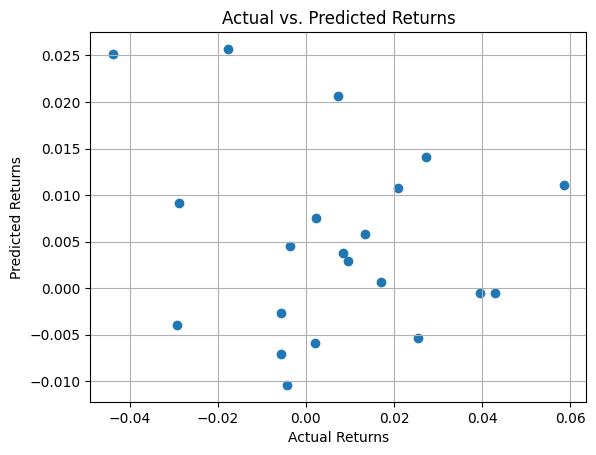

In [230]:
plt.scatter(results['Actual'], results['Predicted'])
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.title('Actual vs. Predicted Returns')
plt.grid(True)
plt.show()